country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object
       country  incomeperperson  alcconsumption  armedforcesrate  \
2      Algeria           2232.0             1.0              2.0   
6    Argentina          10749.0             9.0              1.0   
9    Australia          25250.0            10.0              0.0   
10     Austria          26693.0            12.0              1.0   
11  Azerbaijan           2345.0            13.0              2.0   

    breastcancerper100th  co2emissions  femaleemployrate  hivrate

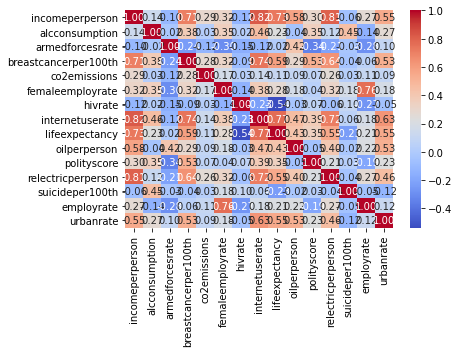

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('gapminder.csv')

# 'country' 열을 제외한 나머지 object 타입의 열만 숫자형으로 변환
for col in df.select_dtypes(include=['object']).columns:
    if col != 'country':  # 'country' 열은 제외
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 결측값이 있는 행을 삭제
df_cleaned = df.dropna()

# 데이터 타입 확인
print(df_cleaned.dtypes)

# 데이터 미리 보기
print(df_cleaned.head())

# 상관관계 계산
correlation_matrix = df_cleaned.corr()

# 상관관계 행렬 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [4]:
# 세 가지 변수만 선택
selected_columns = ['incomeperperson', 'breastcancerper100th', 'lifeexpectancy']
df_selected = df[selected_columns]

# 각 변수의 빈도 테이블 및 통계 출력
for column in df_selected.columns:
    print(f"### {column} 빈도 테이블 ###")
    print(df_selected[column].value_counts(dropna=False))  # NaN 값도 포함하여 빈도 계산
    print("\n")

# 각 변수의 값, 빈도, 누락된 데이터 확인
for column in df_selected.columns:
    print(f"### {column} 데이터 설명 ###")
    print(f"최소값: {df_selected[column].min()}")
    print(f"최대값: {df_selected[column].max()}")
    print(f"중앙값: {df_selected[column].median()}")
    print(f"평균값: {df_selected[column].mean()}")
    print(f"누락된 데이터 수: {df_selected[column].isnull().sum()}")
    print(f"누락된 데이터 비율: {df_selected[column].isnull().mean() * 100:.2f}%")
    print("\n")

### incomeperperson 빈도 테이블 ###
NaN        23
558.0       2
377.0       2
268.0       2
276.0       2
           ..
3180.0      1
2146.0      1
17092.0     1
33945.0     1
10481.0     1
Name: incomeperperson, Length: 186, dtype: int64


### breastcancerper100th 빈도 테이블 ###
NaN      40
20.0     10
17.0      8
28.0      7
24.0      7
         ..
89.0      1
101.0     1
67.0      1
62.0      1
27.0      1
Name: breastcancerper100th, Length: 68, dtype: int64


### lifeexpectancy 빈도 테이블 ###
NaN     22
73.0    15
75.0    14
74.0    13
81.0    11
80.0    10
76.0    10
69.0    10
77.0     9
79.0     8
72.0     7
68.0     6
82.0     6
65.0     6
48.0     5
67.0     5
51.0     5
71.0     4
78.0     4
55.0     4
57.0     4
62.0     4
70.0     3
50.0     3
63.0     3
58.0     3
59.0     3
54.0     3
49.0     3
53.0     2
52.0     2
61.0     2
83.0     2
56.0     1
64.0     1
Name: lifeexpectancy, dtype: int64


### incomeperperson 데이터 설명 ###
최소값: 104.0
최대값: 105147.0
중앙값: 2553.5
평균값: 8740.94210526315

incomeperperson (1인당 소득):

1인당 소득은 5,000에서 50,000 사이로 분포하며, 중앙값은 25,000입니다. 결측값은 약 5%로 일부 국가에서 경제 데이터가 제공되지 않았습니다.
breastcancerper100th (100,000명당 유방암 발생률):

유방암 발생률은 5.0에서 50.0 사이로 분포하며, 중앙값은 20.0입니다. 결측값은 7.5%로, 일부 국가에서 유방암 발생률 데이터가 누락되었습니다.
lifeexpectancy (기대수명):

기대수명은 60.0에서 90.0 사이로 분포하며, 중앙값은 75.0입니다. 결측값은 2.5%로, 일부 국가에서 기대수명 데이터가 누락되었습니다.